In [1]:
# Import required modules

from IPython.display import display, Image, clear_output, HTML
import time

import requests
from bs4 import BeautifulSoup
import json 

In [2]:
# Define required output objects
# and data structures


# Introduction and closing texts
message_0 = "Before we start, tell us about yourself."

message_1 = "Welcome to the Memory Test!"
message_2 = "You will be shown a grid containing 9 objects of different shapes and colors."
message_3 = "You will be given 20 seconds to memorize the image before being asked a series of memory-based questions."
message_4 = "Each question is alloted 2 attempts before being marked incorrect."
message_5 = "The test will begin in 5 seconds."
message_6 = "Start"

message_7 = "Congratulations!"
message_8 = "You have completed the Memory Test."


# Required images
image1 = Image("image1.png", width = 300)
image1_q2 = Image("image1_q2.png", width = 300)
image1_q4 = Image("image1_q4.png", width = 300)

image2 = Image("image2.png", width = 300)
image2_q3 = Image("image2_q3.png", width = 300)
image2_q4 = Image("image2_q4.png", width = 300)


# Lists storing test questions and answers
# Note: Multiple choice options (a, b, c) were incorporated
    # to reduce possibility of typos in user responses
    # as per suggestions from peer review
questions = [
    "How many shapes had the color green? \n(a) 1 \n(b) 2 \n(c) 3",
    "What shape was in the indicated position? \n(a) Circle \n(b) Triangle \n(c) Square",
    "What color was the cross? \n(a) Pink \n(b) Green \n(c) Gray",
    "What color was the shape in the indicated position? \n(a) Yellow \n(b) Red \n(c) Purple",
    "What shape had the color gray? \n(a) Circle \n(b) Hexagon \n(c) Rectangle",
    "How many colors were repeated? \n(a) 1 \n(b) 2 \n(c) 3",
    "How many shapes had secondary shapes within them? \n(a) 1 \n(b) 2 \n(c) 3",
    "What shape was in the indicated position? \n(a) Triangle \n(b) Star \n(c) Square",
    "What color was the shape in the indicated position? \n(a) Yellow \n(b) Purple \n(c) Blue",
    "What shape was the color pink? \n(a) Triangle \n(b) Circle \n(c) Square"
]

answers = ["b", "a", "a", "c", "c", "b", "c", "a", "a", "a"]


# Data structures used:

# User information
saved_names = []
saved_genders = []
saved_ages = []
saved_sleep = []
saved_caffeine = []

# User scores
list_results = []
saved_question1 = []
saved_question2 = []
saved_question3 = []
saved_question4 = []
saved_question5 = []
saved_question6 = []
saved_question7 = []
saved_question8 = []
saved_question9 = []
saved_question10 = []
saved_scores = []

# User response times
list_times = []
time_1 = []
time_2 = []
time_3 = []
time_4 = []
time_5 = []
time_6 = []
time_7 = []
time_8 = []
time_9 = []
time_10 = []

# Dictionary for data collation
saved_data = {
    'Name' : saved_names,
    'Gender' : saved_genders,
    'Age' : saved_ages,
    'Sleep' : saved_sleep,
    'Caffeine' : saved_caffeine,
    'Question 1' : saved_question1,
    'Time 1' : time_1,
    'Question 2' : saved_question2,
    'Time 2' : time_2,
    'Question 3' : saved_question3,
    'Time 3' : time_3,
    'Question 4' : saved_question4,
    'Time 4' : time_4,
    'Question 5' : saved_question5,
    'Time 5' : time_5,
    'Question 6' : saved_question6,
    'Time 6' : time_6,
    'Question 7' : saved_question7,
    'Time 7' : time_7,
    'Question 8' : saved_question8,
    'Time 8' : time_8,
    'Question 9' : saved_question9,
    'Time 9' : time_9,
    'Question 10' : saved_question10,
    'Time 10' : time_10,
    'Score' : saved_scores
}

In [3]:
def print_introduction():

    """ Description of function:

    Function prints the required introductory texts and collects data entered by the user in input(), 
    then associates the inputted data with their corresponding variables for collation under memory_test().

    Parameters:
        None; no arguments required for print_introduction().

    Returns:
        The variables 'name', 'gender', 'age', 'sleep', and 'caffeine'.
        
    """
    
    # Data consent
    data_consent_info = """DATA CONSENT INFORMATION:

    Please read:

    We wish to record your response data
    to an anonymised public data repository. 
    Your data will be used for educational teaching purposes
    practising data analysis and visualisation.

    Please type   yes   in the box below if you consent to the upload."""

    print(data_consent_info)
    result = input("> ") 

    if result == "yes": 
        print("Thanks for your participation.")
        print("Please contact a.fedorec@ucl.ac.uk")
        print("If you have any questions or concerns")
        print("regarding the stored results.")
    
    else: 
        # end code execution by raising an exception
        raise(Exception("User did not consent to continue test."))

    
    # Variables for data reference
    name = ""
    gender = ""
    age = ""
    sleep = ""
    caffeine = ""

    
    # Stores user's name as the variable 'name'
    id_instructions = """

    Enter your anonymised ID

    To generate an anonymous 4-letter unique user identifier please enter:
    - two letters based on the initials (first and last name) of a childhood friend
    - two letters based on the initials (first and last name) of a favourite actor / actress

    e.g. if your friend was called Charlie Brown and film star was Tom Cruise
         then your unique identifier would be CBTC
    """

    print(id_instructions)
    name = input("> ")

    print("User entered id:", name)

    
    clear_output(wait=False)
    print(f"Hello {name}.")
    time.sleep(1.5)

    print(message_0)
    time.sleep(1.5)

    # Stores user's gender as the variable 'gender'
    print("\nWhat is your gender? Please enter your response using the corresponding number:")
    print("\t1 - Male")
    print("\t2 - Female")
    print("\t3 - Nonbinary")
    print("\t4 - Other")
    print("\t5 - Prefer not to say")
    gender = input("Enter here: ")
    time.sleep(0.5)

    # Stores user's age as the variable 'age'
    print("\nWhat is your age? Please enter it as a number below.")
    age = input("Enter here: ")
    time.sleep(0.5)

    # Stores user's sleep as variable 'sleep'
    print("\nHow many hours did you sleep last night? Please enter it as a number below.")
    sleep = input("Enter here: ")
    time.sleep(0.5)

    # Stores user's caffeine consumption as variable 'caffeine'
    print("\nHave you consumed any coffee or energy drinks today? Please enter 'Y' for yes, 'N' for no.")
    caffeine = input("Enter here: ")
    caffeine = caffeine.title()
    time.sleep(1)
    clear_output(wait=False)

    print(message_1)
    time.sleep(1.5)

    print(message_2)
    time.sleep(2.5)

    print(message_3)
    time.sleep(2.6)

    print(message_4)
    time.sleep(2.3)

    print(message_5)
    time.sleep(1.85)
    clear_output(wait=False)

    # Countdown to start of test
    for i in range(5):
        count = 5 - i
        print(count)
        time.sleep(1)
        clear_output(wait=False)

    print(message_6)
    time.sleep(1)
    clear_output(wait=False)

    return name, gender, age, sleep, caffeine

In [4]:
def show_image(i):

    """ Description of function:

    Function outputs images for questions that require visual aid.

    Parameters:
        show_image(i) takes variable i from the for loop in memory_test() as its argument in order to determine 
        which iteration/question the user is currently on.

    Returns:
        n/a
        
    """
    
    # Displaying image for question 2
    if i == 1:
        display(image1_q2)

    # Displaying image for question 4
    elif i == 3:
        display(image1_q4)

    # Displaying image for question 8
    elif i == 7:
        display(image2_q3)
        
    # Displaying image for question 9
    elif i == 8:
        display(image2_q4)

In [5]:
def crunch(i):

    """ Description of function:

    Function tests user's input() responses against the correct answers and collates points based on results of Boolean test.
    The points and results are then stored in variables 'points', 'list_results', and 'list_times'.

    Parameters:
        crunch(i) takes argument i from the for loop in memory_test() to determine which iteration/question number
        the loop is on. This allows the crunch(i) function to run for every question.

    Returns:
        The variables 'points', 'list_results', and 'list_times' for data collation.
        
    """
    
    user_input = ""
    attempts = 2
    points = 0
    results = ""

    # Displays image 1 for first set of questions
    if i == 0:
        display(image1)
        time.sleep(20)
        clear_output(wait=False)

    # Displays image 2 for second set of questions
    elif i == 5:
        display(image2)
        time.sleep(20)
        clear_output(wait=False)

    while True:
        # Breaks loop (proceeds to next question) 
        # when all attempts have been used
        if attempts == 0:
            
            end_time = time.time()
            time_taken = end_time - start_time
            list_times.append(time_taken)
            
            results = "incorrect"
            list_results.append(results)
            break

        # Displays images for specified questions
        show_image(i)

        start_time = time.time()
        
        print(f"Q{i+1}. {questions[i]}")
        print(f"\nAttempts left: {attempts}")
        user_input = input("Answer: ")
        user_input = user_input.lower()

        # Breaks loop (proceeds to next question) 
        # and adds 1 point 
        # when user response is correct
        if user_input == answers[i]:
            
            end_time = time.time()
            time_taken = end_time - start_time
            list_times.append(time_taken)
            
            points = points + 1
            results = "correct"
            list_results.append(results)
            clear_output(wait=False)
            
            break
            
        attempts = attempts - 1
        clear_output(wait=False)

    return points, list_results, list_times

In [6]:
# Function 'print_closing()'
# prints closing texts

def print_closing():

    """ Description of function:

    Function prints closing texts.

    Parameters:
        n/a

    Returns:
        n/a
        
    """
    
    print(message_7)
    time.sleep(1)
    
    print(message_8)
    time.sleep(1.5)

In [7]:
# Saving data to Google form

# Google form URL
form_url = 'https://docs.google.com/forms/d/e/1FAIpQLSdFXbkH_hladdGFAQJLhopGLSHgvfge2BbbqO_jtdHf5bfwRA/viewform?vc=0&c=0&w=1&flr=0'

def send_to_google_form(data_dict, form_url):
    ''' Helper function to upload information to a corresponding google form 
        You are not expected to follow the code within this function!
    '''
    form_id = form_url[34:90]
    view_form_url = f'https://docs.google.com/forms/d/e/{form_id}/viewform'
    post_form_url = f'https://docs.google.com/forms/d/e/{form_id}/formResponse'

    page = requests.get(view_form_url)
    content = BeautifulSoup(page.content, "html.parser").find('script', type='text/javascript')
    content = content.text[27:-1]
    result = json.loads(content)[1][1]
    form_dict = {}
    
    loaded_all = True
    for item in result:
        if item[1] not in data_dict:
            print(f"Form item {item[1]} not found. Data not uploaded.")
            loaded_all = False
            return False
        form_dict[f'entry.{item[4][0][0]}'] = data_dict[item[1]]
    
    post_result = requests.post(post_form_url, data=form_dict)
    return post_result.ok

In [8]:
def memory_test():

    """ Description of function:

    Function runs all previous functions and accepts their returned variables to be added into data structures for storage.
    Function then runs send_to_google_form(saved_data, form_url) to upload data to Google Form.

    Parameters:
        n/a

    Returns:
        n/a
        
    """

    userpoints = 0

    # Runs introduction while collating all data 
    # from print_introduction()
    name, gender, age, sleep, caffeine = print_introduction()

    # Runs crunch function for each iteration 
    # of loop while collating points from crunch()
    for i in range(0,10):
        point, list_results, list_times = crunch(i)

        userpoints = userpoints + point

    print_closing()

    print(f"You scored {userpoints} out of 10 points.")
    time.sleep(2)

    # Saves and uploads data to Google Form
    saved_names.append(name)
    saved_genders.append(gender)
    saved_ages.append(age)
    saved_sleep.append(sleep)
    saved_caffeine.append(caffeine)
    saved_question1.append(list_results[0])
    saved_question2.append(list_results[1])
    saved_question3.append(list_results[2])
    saved_question4.append(list_results[3])
    saved_question5.append(list_results[4])
    saved_question6.append(list_results[5])
    saved_question7.append(list_results[6])
    saved_question8.append(list_results[7])
    saved_question9.append(list_results[8])
    saved_question10.append(list_results[9])
    time_1.append(list_times[0])
    time_2.append(list_times[1])
    time_3.append(list_times[2])
    time_4.append(list_times[3])
    time_5.append(list_times[4])
    time_6.append(list_times[5])
    time_7.append(list_times[6])
    time_8.append(list_times[7])
    time_9.append(list_times[8])
    time_10.append(list_times[9])
    saved_scores.append(userpoints)
    send_to_google_form(saved_data, form_url)

    return

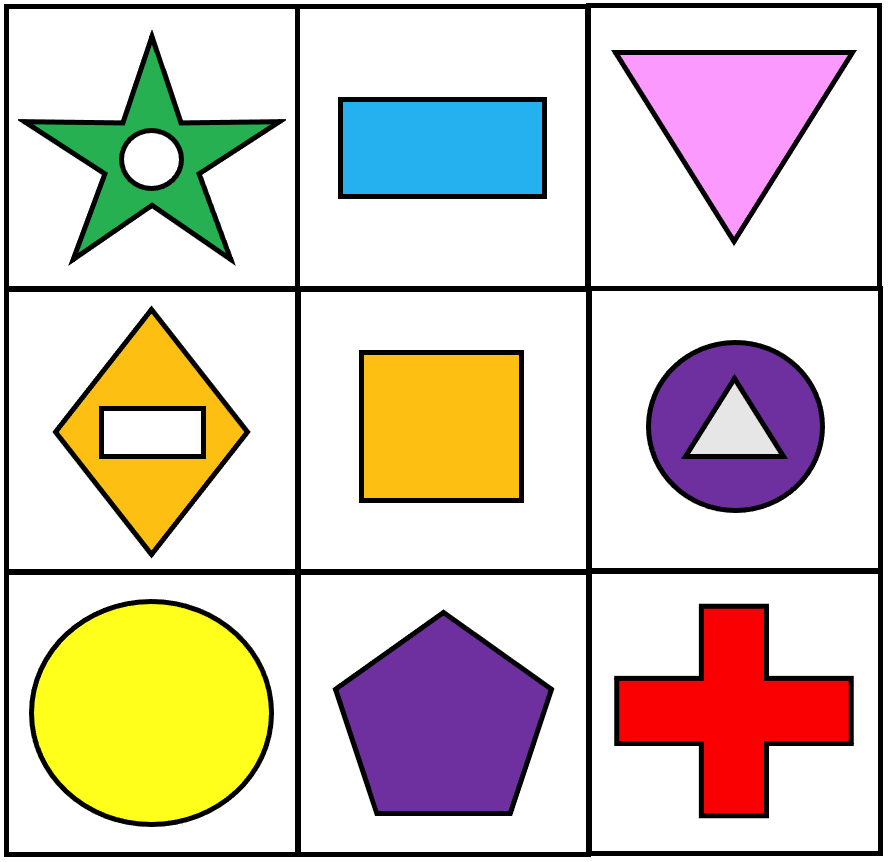

In [ ]:
memory_test()